# 2. Handling Missing values
## 2.1 Method dropping technique

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("loan_data_set.csv")

In [3]:
df.head()              

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **Decision-Making During Data Cleaning** ✅

| % Null Values | Possible Actions |
|--------------|----------------|
| **0-10%** | **Impute** using mean, median, mode, or forward/backward fill. |
| **10-30%** | **Impute** if the feature is important, otherwise consider dropping. |
| **30-50%** | **Impute with advanced methods** (e.g., regression, KNN) if necessary. Otherwise, drop if less important. |
| **>50-70%** | Drop the column unless it's **critical**, in which case consider advanced imputation. |
| **>70-90%** | **Mostly drop**, as too much missing data may lead to unreliable results. |
| **>90%** | Drop the column; it’s likely unusable. |

----

## <u>Insights from Null Value Percentage: </u>

### 1. Data Quality Assessment 
A high percentage of missing values in a column may indicate poor data quality or data collection issues.

A low percentage might suggest occasional missing values, which may be easier to handle.

### 2. Feature Importance & Usability 
More than 50-70 % missing values in a feature/column suggests that the data might ve irrelevant for analysis and could be dropped

If an important feature has missing values, we need to decide whether to impute them or handle them differently.

### 3. Patterns in Missingness
If missing values are concentrated in specific categories or groups, it might reveal a pattern  that helps in understanding data collection issues.

Eg. In medical data, missing values in blood pressure might be more common for younger patients.

### 4. Impact on Machine Learning Models
Columns with high missing values may lead to biased or unreliable models.

Filling missing values with mean, median, mode, or predictive models, can help retain useful information.


In [4]:
# lets find the percentage null value for each column 
# percentage null value helps us to take decisions like relevancy of the column


In [5]:
#1> as we know from the above data that credit history is having highest 8% 
# missing values lets treat it as if this clomun/feature is having 80 percent
# missing value so when a feature in a dataset is having more than 50 percent missing values 
# we generally consider to drop it as the feature is irrelevant with that many missing values

(df.isnull().sum()/df.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [6]:
# Since the column Credit History has the most null percentage lets assume this 8percent as 80%

df.drop(columns=["Credit_History"],inplace = True)

In [7]:
df.shape #Observe the column reduced from the 13 to 12

(614, 12)

In [8]:
# Now Number of Null Values in each Row

df.isnull().sum(axis = 1)


0      1
1      0
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Length: 614, dtype: int64

### NOTE For Above CODE: `Important`
```python

df.isnull().sum(axis = 1)

```
**The Concept of axis**

1. `axis = 0` `(default)` : operates along rows (reducing rows). Think of it as performing the operation "down the columns."
For Example : Summing along axis = 0 adds all row values for each column

2. `axis = 1`: Operates along cloumns (Reducing columns).
Think of it as performing the operation "across the row".
For Example : Summing along axis = 1 adds all column values for each row.



In [9]:
# Now Percentage Null Value of Each Row

null_count_per_row = df.isnull().sum(axis = 1)

# null percentage in each row

nullPercentageInEachRow = (null_count_per_row/df.shape[1])*100

print(nullPercentageInEachRow)



0      8.333333
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
609    0.000000
610    0.000000
611    0.000000
612    0.000000
613    0.000000
Length: 614, dtype: float64


## To Find Row Having The Most Null Percentage

### Method 1. Using `idxmax()`

In [10]:
# To Find Row having the most null percentage

# 1 null count
null_count_per_row = df.isnull().sum(axis = 1)

# 2 null percentage in each row
nullPercentageInEachRow  = (null_count_per_row/df.shape[1])*100

# 3 find the index of the row having maximum null perecentage Null Value.
maxNullPercentage_rowIndex = nullPercentageInEachRow.idxmax()

# 4. finding the maximum null percentage of the row using the maxNullPercentage_rowIndex
max_null_percentage = nullPercentageInEachRow[maxNullPercentage_rowIndex]

# 5. printing the index and the percentage missing value in it

print(f"Row {maxNullPercentage_rowIndex} has the highest null percentage value: {max_null_percentage:.2f}%")
# Nice thats the way to go

Row 435 has the highest null percentage value: 25.00%


## Method 2. Using `max()`
### since `idxmax()` gives only the first instance of the maximum null percentage we are using `max()` to find every row index which has the maximum null percentage

In [11]:
null_count_per_row = df.isnull().sum(axis = 1)

nullPercentageInEachRow = (null_count_per_row/df.shape[1])*100

# maximum Null Percentage in the whole dataFrame
maxNullPercentage = nullPercentageInEachRow.max()

# Getting all the rows having maximum percentage
rows_with_max_null_percentage = df[nullPercentageInEachRow == maxNullPercentage].index

# .index to get the index only
# rows_with_maxNullPercentage = dataset[nullPercentage_rowWise == maxNullPercentage]
# This code Creates a Boolean Series where each row is True if its null percentage matches maxNullPercentage.
# Uses Boolean Indexing on dataset to select only those rows where the condition is True.
# Stores the result in rows_with_maxNullPercentage, which contains all rows with the highest null percentage.

print(f"These Rows : {rows_with_max_null_percentage} \n have {maxNullPercentage} null percentage")



These Rows : Index([435], dtype='int64') 
 have 25.0 null percentage


In [12]:
# Since these rows has the highest Null Percentage lets drop them
df.drop(index=[95,435],inplace = True)

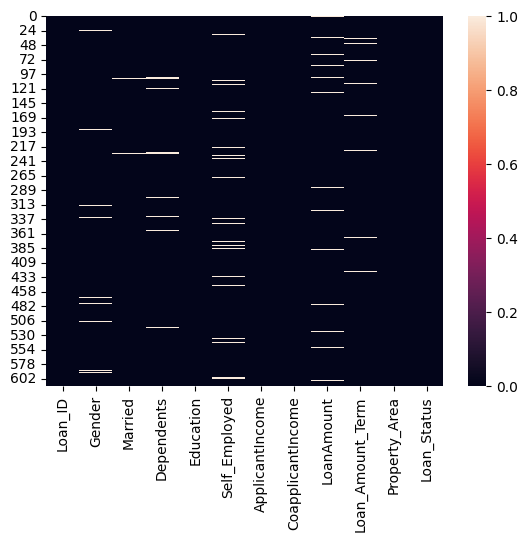

In [13]:
sns.heatmap(df.isnull())
plt.show()

In [14]:
# Now lets drop all those rows in the dataFrame which have missing values

df.dropna(inplace = True)


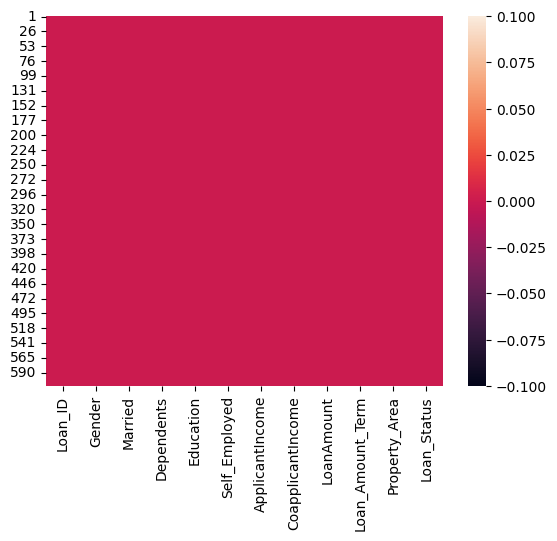

In [15]:
sns.heatmap(df.isnull())
plt.show()

### Lets see how much Data we lost By dropping all those Rows and cloumns which were having the missing values 

In [16]:
df.shape

(523, 12)

In [17]:
# Total lost data 
# previously we had 614 rows and 13 columns

total_lost_data = (((614*13 - df.shape[0]*df.shape[1]) - 614)/(614*13))*100
print(f"We Lost {total_lost_data}% data in total")

We Lost 13.680781758957655% data in total
